In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor

# New Section

In [ ]:
# Load the data from the CSV
data = pd.read_csv('feeds.csv')

# Define the features (temperature and humidity) and target (moisture)
X = data[['Temperature', 'Humidity']]
y = data['Moisture']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['Temperature', 'Humidity'])
X_scaled['Motor']=data['Motor']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=X_scaled['Motor'])



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(609, 3)
(153, 3)
(609,)
(153,)


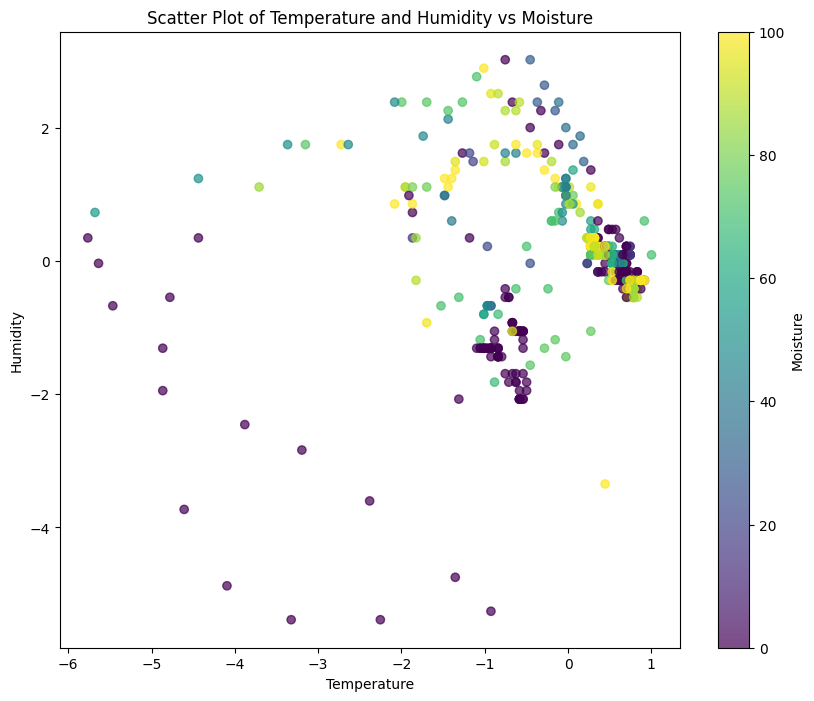

In [ ]:
# Scatter plot of two input features (e.g., Temperature vs Humidity) vs output (Moisture)
plt.figure(figsize=(10, 8))
plt.scatter(X_train['Temperature'], X_train['Humidity'], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Temperature and Humidity vs Moisture')
plt.colorbar(label='Moisture')
plt.show()

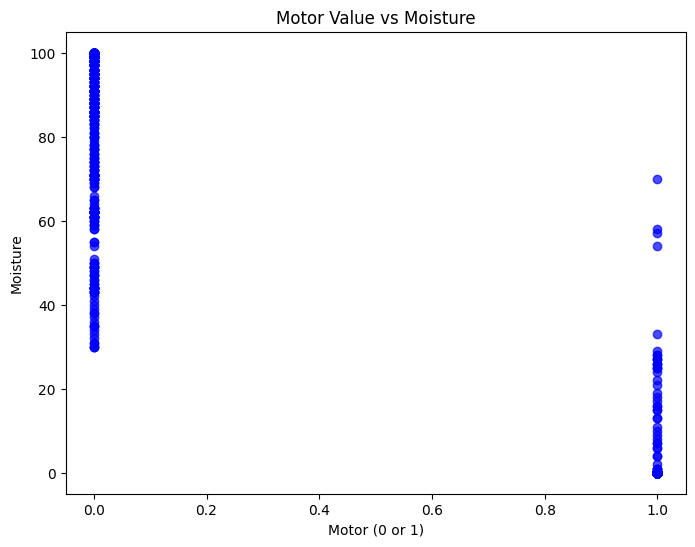

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Motor (0 or 1) vs Moisture
plt.figure(figsize=(8, 6))
plt.scatter(data['Motor'], data['Moisture'], color='blue', alpha=0.7)

# Labels and title
plt.xlabel('Motor (0 or 1)')
plt.ylabel('Moisture')
plt.title('Motor Value vs Moisture')

# Show the plot
plt.show()

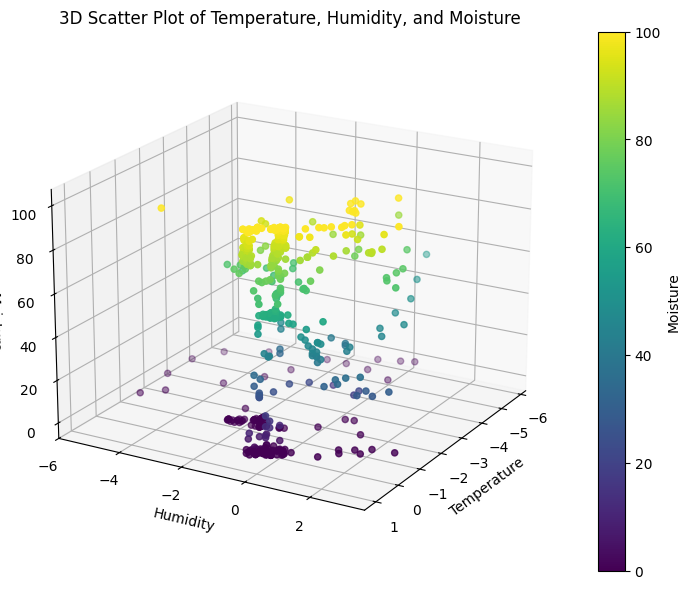

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with moisture as height (z-axis)
scatter = ax.scatter(X_train['Temperature'], X_train['Humidity'], y_train, c=y_train, cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Moisture')

# Title
ax.set_title('3D Scatter Plot of Temperature, Humidity, and Moisture')

# Add color bar for moisture
fig.colorbar(scatter, ax=ax, label='Moisture')

# Rotate the plot for better view (optional)
ax.view_init(elev=20, azim=30)  # Set the elevation and azimuthal angle for better visualization

plt.show()


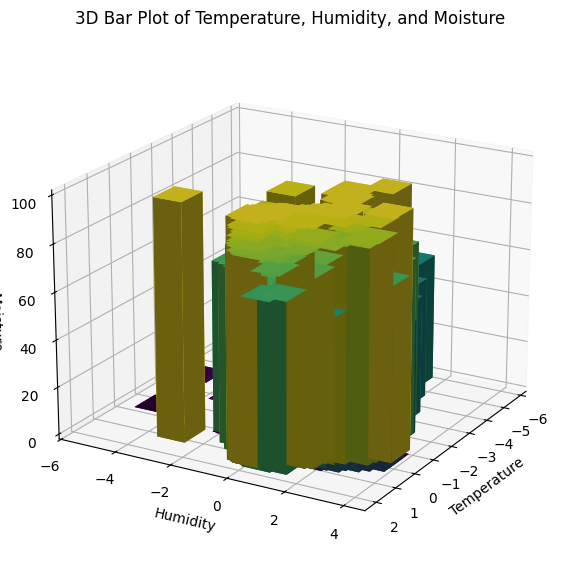

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D bar plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z values
x = X_train['Temperature']
y = X_train['Humidity']
z = np.zeros_like(y_train)
dx = dy = 1
dz = y_train

# Plot bars
ax.bar3d(x, y, z, dx, dy, dz, color=plt.cm.viridis(np.array(dz)/max(dz)), shade=True)

# Labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Moisture')
ax.set_title('3D Bar Plot of Temperature, Humidity, and Moisture')

# Rotate view
ax.view_init(elev=20, azim=30)

plt.show()

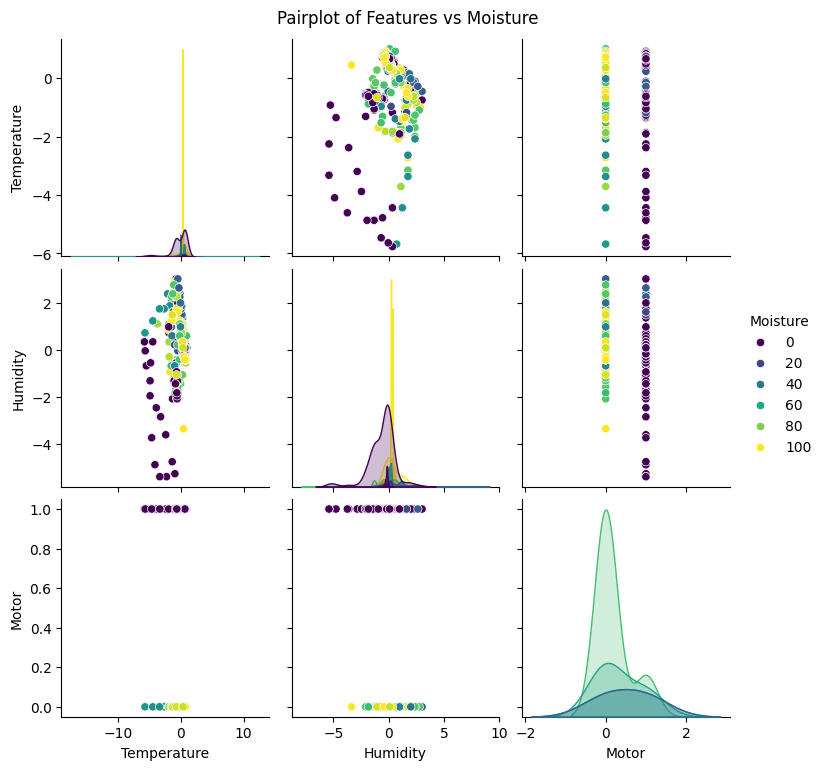

In [ ]:
# Combine the input features and the output in a single DataFrame
X_train_combined = X_train.copy()
X_train_combined['Moisture'] = y_train

# Plot pairwise scatter plots of all features
sns.pairplot(X_train_combined, hue='Moisture', palette='viridis')
plt.suptitle('Pairplot of Features vs Moisture', y=1.02)
plt.show()
plt.show()

In [ ]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Calculate accuracy metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print results
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")


Linear Regression MSE: 234.33873017317106
Linear Regression R2: 0.8695945267275592


In [ ]:
# Initialize the PolynomialFeatures transformer (degree 5)
poly = PolynomialFeatures(degree=5)

# Transform the features to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
poly_regressor = LinearRegression()

# Fit the model
poly_regressor.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_regressor.predict(X_test_poly)

# Calculate accuracy metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression R2: {r2_poly}")


Polynomial Regression MSE: 194.9712078199442
Polynomial Regression R2: 0.8915018758893568


In [ ]:
# Initialize the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(max_depth=6,random_state=42)

# Fit the model
tree_regressor.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_regressor.predict(X_test)

# Calculate accuracy metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print results
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R2: {r2_tree}")


Decision Tree MSE: 152.74774903261465
Decision Tree R2: 0.9149985045614171


In [ ]:
# Initialize the Neural Network Regressor
nn_regressor = MLPRegressor(hidden_layer_sizes=(100,2000,400), max_iter=1000, random_state=42)

# Fit the model
nn_regressor.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_regressor.predict(X_test)

# Calculate accuracy metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print results
print(f"Neural Network MSE: {mse_nn}")
print(f"Neural Network R2: {r2_nn}")


Neural Network MSE: 162.79517625296418
Neural Network R2: 0.9094072841051491


In [ ]:
# Initialize and fit the XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R2: {r2_xgb}")


XGBoost MSE: 184.5177459716797
XGBoost R2: 0.8973190784454346


In [ ]:
# Initialize the base regressor (shallow decision tree)
base_regressor = DecisionTreeRegressor(max_depth=5)

# Initialize and fit the AdaBoost model
ada_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
ada_regressor.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_regressor.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost MSE: {mse_ada}")
print(f"AdaBoost R2: {r2_ada}")

AdaBoost MSE: 190.54928481255115
AdaBoost R2: 0.8939625999964101


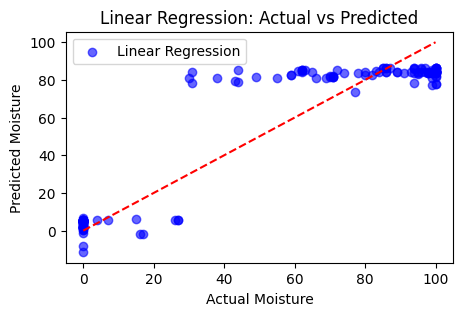

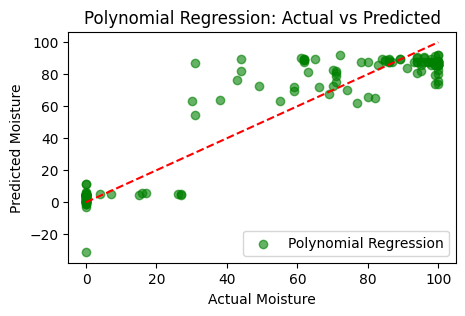

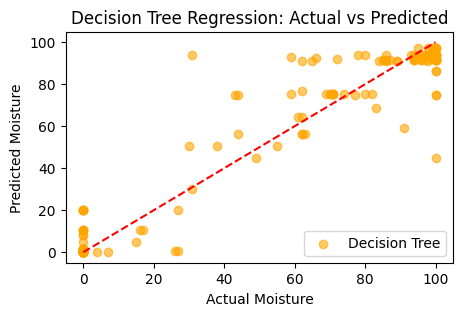

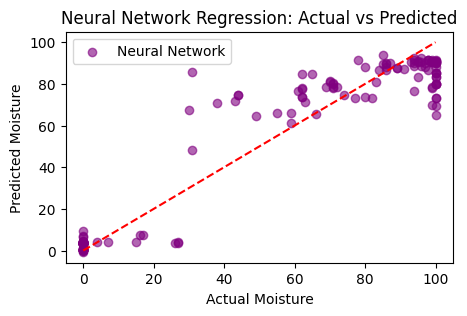

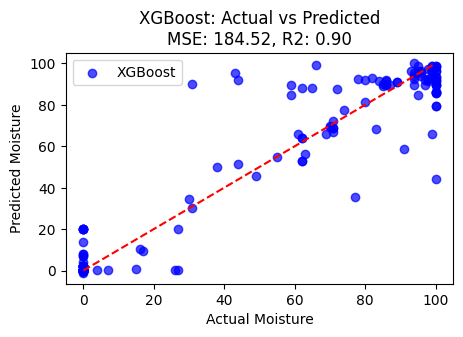

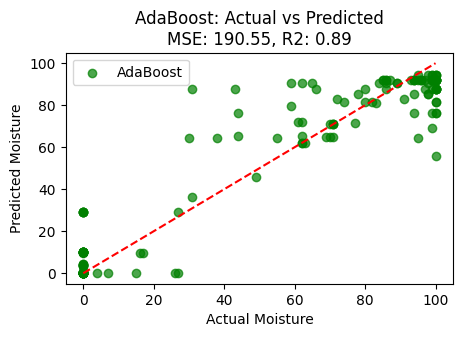

In [ ]:
# Plotting the actual vs predicted values for each model

# Plot for Linear Regression
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Moisture')
plt.ylabel('Predicted Moisture')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Plot for Polynomial Regression
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_poly, color='green', label='Polynomial Regression', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Moisture')
plt.ylabel('Predicted Moisture')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Plot for Decision Tree Regression
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_tree, color='orange', label='Decision Tree', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Moisture')
plt.ylabel('Predicted Moisture')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Plot for Neural Network Regression
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_nn, color='purple', label='Neural Network', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Moisture')
plt.ylabel('Predicted Moisture')
plt.title('Neural Network Regression: Actual vs Predicted')
plt.legend()
plt.show()


# Plot for XGBoost
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Moisture')
plt.ylabel('Predicted Moisture')
plt.title(f'XGBoost: Actual vs Predicted\nMSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}')
plt.legend()
plt.show()

# Plot for AdaBoost
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_ada, color='green', label='AdaBoost', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Moisture')
plt.ylabel('Predicted Moisture')
plt.title(f'AdaBoost: Actual vs Predicted\nMSE: {mse_ada:.2f}, R2: {r2_ada:.2f}')
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame to compare the results of the three models + Neural Network
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Neural Network', 'XGBoost', 'AdaBoost'],
    'MSE': [mse_linear, mse_poly, mse_tree, mse_nn, mse_xgb, mse_ada],
    'R2': [r2_linear, r2_poly, r2_tree, r2_nn, r2_xgb, r2_ada]
})

# Print the comparison of models
print(results)


                   Model         MSE        R2
0      Linear Regression  234.338730  0.869595
1  Polynomial Regression  194.971208  0.891502
2          Decision Tree  152.747749  0.914999
3         Neural Network  162.795176  0.909407
4                XGBoost  184.517746  0.897319
5               AdaBoost  190.549285  0.893963


In [ ]:
# Predict using neural network
humidity=70
temperature=30
motor=0

new_data=[[temperature,humidity]]
new_data_scaled = scaler.transform(new_data)
new_data_scaled = np.append(new_data_scaled[0],motor)

new_data_scaled = pd.DataFrame([new_data_scaled], columns=['Temperature', 'Humidity', 'Motor'])
predicted_moisture = tree_regressor.predict(new_data_scaled)
print(predicted_moisture)

[75.42857143]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
